# **Project Title**

## **Customer Segmentation + Purchase Prediction using Supervised and Unsupervised Learning**



# DataSet

We’ll use the built-in Breast Cancer dataset from Scikit-learn (since it works perfectly in Colab without needing a file).

Supervised task: Predict if tumor is malignant or benign

Unsupervised task: Cluster patients into groups based on tumor characteristics

# 1) INSTALL & IMPORT LIBRARIES

In [1]:
# =========================
# STEP 1: Install Gradio (for the app)
# =========================
!pip -q install gradio

# =========================
# STEP 2: Import libraries
# =========================
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns

import gradio as gr


# **2) LOAD DATASET + CREATE DATAFRAME**

In [2]:
# =========================
# STEP 3: Load dataset
# =========================
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

# =========================
# STEP 4: Inspect dataset
# =========================
print("Feature shape:", X.shape)
print("Target shape:", y.shape)

X.head()


Feature shape: (569, 30)
Target shape: (569,)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# **3) TRAIN-TEST SPLIT**

In [3]:
# =========================
# STEP 5: Split data
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (455, 30)
Test size: (114, 30)


# **4) SUPERVISED LEARNING: LOGISTIC REGRESSION MODEL**

**4.1 Build Pipeline (Scaling + Model)**

In [4]:
# =========================
# STEP 6: Create supervised learning pipeline
# StandardScaler -> LogisticRegression
# =========================
supervised_model = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=5000))
])

# =========================
# STEP 7: Train model
# =========================
supervised_model.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', LogisticRegression(max_iter=5000))])

**4.2 Evaluate Model**

Accuracy: 0.9824561403508771

Classification Report:

              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



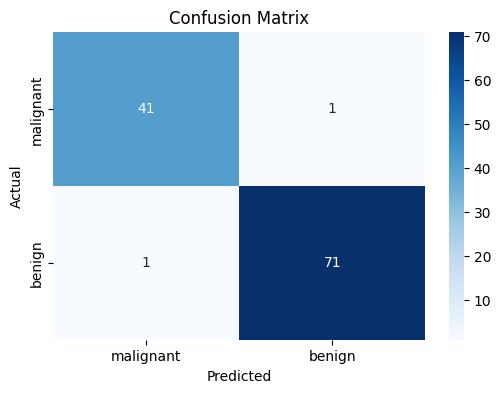

In [5]:
# =========================
# STEP 8: Predict on test set
# =========================
y_pred = supervised_model.predict(X_test)

# =========================
# STEP 9: Accuracy + Report
# =========================
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# =========================
# STEP 10: Confusion Matrix
# =========================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# **5) UNSUPERVISED LEARNING: CLUSTERING (KMEANS)**

**5.1 Scale the Data**

In [6]:
# =========================
# STEP 11: Scale features for clustering
# =========================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**5.2 Find Best K using Silhouette Score**

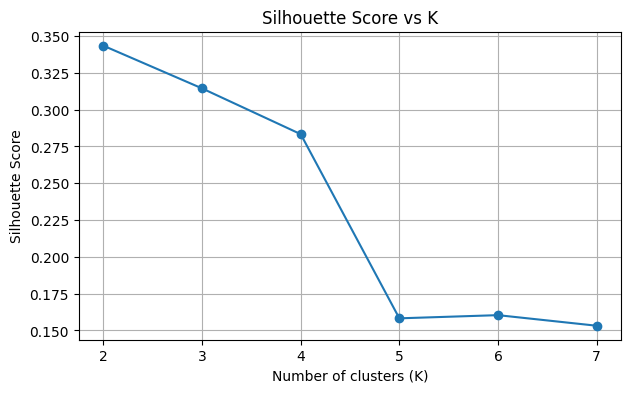

Best K based on silhouette score: 2


In [7]:
# =========================
# STEP 12: Test K values
# =========================
sil_scores = []
k_values = range(2, 8)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

# =========================
# STEP 13: Plot silhouette scores
# =========================
plt.figure(figsize=(7,4))
plt.plot(k_values, sil_scores, marker="o")
plt.title("Silhouette Score vs K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(sil_scores)]
print("Best K based on silhouette score:", best_k)


**5.3 Train KMeans with Best K**

In [8]:
# =========================
# STEP 14: Train final KMeans model
# =========================
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_scaled)

# Add cluster labels to dataframe
X_clustered = X.copy()
X_clustered["cluster"] = cluster_labels

X_clustered.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cluster
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


**5.4 Visualize Clusters using PCA**

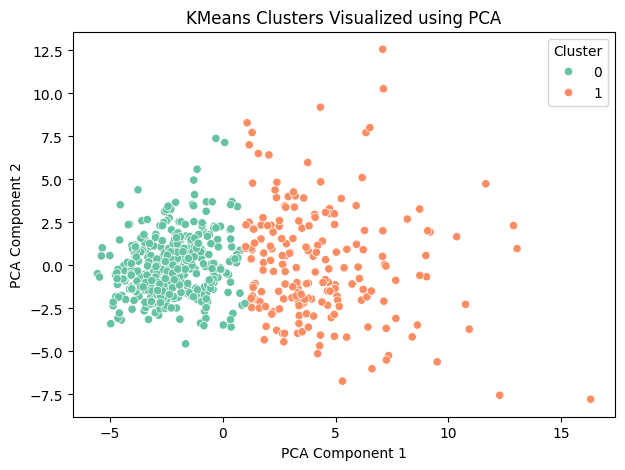

In [9]:
# =========================
# STEP 15: Reduce dimensions to 2D using PCA
# =========================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# =========================
# STEP 16: Plot clusters
# =========================
plt.figure(figsize=(7,5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette="Set2")
plt.title("KMeans Clusters Visualized using PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


# **6) BUILD AN APP IN COLAB (Gradio)**

This app will:

✅ Take feature inputs
✅ Predict tumor type (Supervised model)
✅ Predict which cluster the person belongs to (Unsupervised model)

**6.1 Create Prediction Function**

In [10]:
# =========================
# STEP 17: Create prediction function for app
# =========================
feature_names = list(X.columns)

def predict_tumor_and_cluster(*inputs):
    # Convert inputs to array
    input_array = np.array(inputs).reshape(1, -1)

    # Supervised prediction
    pred_class = supervised_model.predict(input_array)[0]
    pred_label = data.target_names[pred_class]

    # Cluster prediction
    input_scaled = scaler.transform(input_array)
    cluster = kmeans_final.predict(input_scaled)[0]

    return f"Tumor Prediction: {pred_label}", f"Cluster Group: {cluster}"


**6.2 Build the Interface**

In [11]:
# =========================
# STEP 18: Create Gradio UI
# =========================
inputs = [gr.Number(label=fn) for fn in feature_names]

app = gr.Interface(
    fn=predict_tumor_and_cluster,
    inputs=inputs,
    outputs=[
        gr.Textbox(label="Supervised Prediction Output"),
        gr.Textbox(label="Unsupervised Cluster Output")
    ],
    title="Breast Cancer Prediction + Clustering App",
    description="Enter feature values to predict tumor type (Supervised Learning) and cluster group (Unsupervised Learning)."
)

app.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9ad10c14cd1f478667.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
